# FINAL PROJECT
### [Link Github](https://github.com/bitis201/Final-Project_CSC17104)

### Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import matplotlib

## 1. Collecting data

• **What subject is your data about? What is the source of
your data?**
- Data is about top 1000 movies and TV shows according to IMDB rating
- Source can be found [here](https://www.kaggle.com/datasets/anujsingh098/top-1000-imdb-movies?resource=download)
- Description about data has 1 files, 16 columns.

• **Do authors of this data allow you to use like this? You
can check the data license**
- It's on kaggle so it is okay to use the data for my project, i have checked [here](https://www.kaggle.com/general/9893)
- License: `CC0: Public Domain`

• **How did authors collect data?**
- Data is obtained by 2 authors.
- They collect data from https://media-amazon.com/ by using SeriesTitle

## 2. Exploring data (often interleaved with preprocessing)
• How many rows and how many columns?

• What is the meaning of each row?

• Are there `duplicated rows`?

• What is the meaning of each column?


• What is the current data type of each column? Are there columns having `inappropriate data types`?

• With each numerical column, how are values distributed?

    - What is the percentage of missing values?
    - Min? max? Are they abnormal?

• With each categorical column, how are values distributed?
    
    - What is the percentage of missing values?
    - How many different values? Show a few.
    - Are they abnormal?

### Read csv into Dataframe

In [2]:
movies = pd.read_csv('data/imdb_top_1000.csv')

### How many rows and how many columns?

In [3]:
print("rows:"+ str(movies.shape[0]))
print("columns:"+ str(movies.shape[1]))

rows:1000
columns:16


### What is the meaning of each row?

Each row is a pack of information of a single movie

### Are there `duplicated rows`?

In [4]:
duplicated_rows = movies.duplicated().any()
duplicated_rows

False

There isn't duplicated row.

### What is the meaning of each column?

- `PosterLink` - Link of the poster that imdb using SeriesTitle = Name of the movie
- `SeriesTitle` = Name of the movie
- `ReleasedYear` - Year at which that movie released 
- `Certificate` - Certificate earned by that movie 
- `Runtime` - Total runtime of the movie 
- `Genre` - Genre of the movie 
- `IMDBRating` - Rating of the movie at IMDB site
- `Overview` - mini story/ summary
- `Meta_score` - Score earned by the movie
- `Director` - Name of the Director
- `Star1,Star2,Star3,Star4` - Name of the Stars
- `Noofvotes` - Total number of votes
- `Gross` - Money earned by that movie

### What is the current data type of each column? Are there columns having `inappropriate data types`?

In [14]:
def open_object_dtype(s):
    dtypes = set(s.apply(type))
    return dtypes

In [15]:
print('PosterLink :' + str(open_object_dtype(movies['Poster_Link'])))
print('SeriesTitle :' + str(open_object_dtype(movies['Series_Title'])))
print('ReleasedYear :' + str(open_object_dtype(movies['Released_Year'])))
print('Certificate :' + str(open_object_dtype(movies['Certificate'])))
print('Runtime :' + str(open_object_dtype(movies['Runtime'])))
print('Genre :' + str(open_object_dtype(movies['Genre'])))
print('IMDBRating :' + str(open_object_dtype(movies['IMDB_Rating'])))
print('Overview :' + str(open_object_dtype(movies['Overview'])))
print('Meta_score :' + str(open_object_dtype(movies['Meta_score'])))
print('Director :' + str(open_object_dtype(movies['Director'])))
print('Star1,Star2,Star3,Star4 :' + str(open_object_dtype(movies['Star1'])))
print('Noofvotes :' + str(open_object_dtype(movies['No_of_Votes'])))
print('Gross :' + str(open_object_dtype(movies['Gross'])))

PosterLink :{<class 'str'>}
SeriesTitle :{<class 'str'>}
ReleasedYear :{<class 'int'>}
Certificate :{<class 'str'>}
Runtime :{<class 'str'>}
Genre :{<class 'str'>}
IMDBRating :{<class 'float'>}
Overview :{<class 'str'>}
Meta_score :{<class 'float'>}
Director :{<class 'str'>}
Star1,Star2,Star3,Star4 :{<class 'str'>}
Noofvotes :{<class 'int'>}
Gross :{<class 'int'>}


- As we can see, none of these columns having inappropriate data types. But i'll convert `Released_Year` column to int for later use.
- While converting, i found a value named "PG", it's from the movie named "Apolo 13", i dont know what it's mean, so I went to check the release year of that movie and replace that value.

In [7]:
movies.loc[:,'Released_Year'].replace('PG',1995,inplace=True)
movies.loc[:,'Released_Year'] = movies.loc[:,'Released_Year'].astype(int)
print('ReleasedYear :' + str(open_object_dtype(movies['Released_Year'])))

ReleasedYear :{<class 'int'>}


### With each numerical column, how are values distributed? - What is the percentage of missing values? - Min? max? Are they abnormal?

- I arrange `IMDBRating`, `Meta_score`, `Noofvotes`, `Gross`, `Released_Year`  column into numerical group.
- i'll count the percentage of missing, min, max values.

In [8]:
missing = []
missing.append(round(movies.loc[:,'IMDB_Rating'].isna().sum() / movies.loc[:,'IMDB_Rating'].size * 100,3))
missing.append(round(movies.loc[:,'Meta_score'].isna().sum() / movies.loc[:,'Meta_score'].size * 100,3))
missing.append(round(movies.loc[:,'No_of_Votes'].isna().sum() / movies.loc[:,'No_of_Votes'].size * 100,3))
missing.append(round(movies.loc[:,'Gross'].isna().sum() / movies.loc[:,'Gross'].size * 100,3))
missing.append(round(movies.loc[:,'Released_Year'].isna().sum() / movies.loc[:,'Released_Year'].size * 100,3))

minval = []
minval.append(movies.loc[:,'IMDB_Rating'].min())
minval.append(movies.loc[:,'Meta_score'].min())
minval.append(movies.loc[:,'No_of_Votes'].min())
minval.append(movies.loc[:,'Gross'].min())
minval.append(movies.loc[:,'Released_Year'].min())

maxval = []
maxval.append(movies.loc[:,'IMDB_Rating'].max())
maxval.append(movies.loc[:,'Meta_score'].max())
maxval.append(movies.loc[:,'No_of_Votes'].max())
maxval.append(movies.loc[:,'Gross'].max())
maxval.append(movies.loc[:,'Released_Year'].max())

pd.DataFrame([missing,minval,maxval],index=["missing_ratio", "min", "max"],columns=["IMDB_Rating", "Meta_score", "No_of_Votes", "Gross", "Released_Year"])

,IMDB_Rating,Meta_score,No_of_Votes,Gross,Released_Year
missing_ratio,0.0,15.7,0.0,0.0,0.0
min,7.6,28.0,25088.0,1305.0,1920.0
max,9.3,100.0,2343110.0,936662225.0,2020.0


### With each categorical column, how are values distributed? - What is the percentage of missing values? - How many different values? Show a few. Are they abnormal?

- I arrange remaining columns into categorical group.

In [9]:
missing = []
missing.append(round(movies.loc[:,'Poster_Link'].isna().sum() / movies.loc[:,'Poster_Link'].size * 100,3))
missing.append(round(movies.loc[:,'Series_Title'].isna().sum() / movies.loc[:,'Series_Title'].size * 100,3))
missing.append(round(movies.loc[:,'Certificate'].isna().sum() / movies.loc[:,'Certificate'].size * 100,3))
missing.append(round(movies.loc[:,'Runtime'].isna().sum() / movies.loc[:,'Runtime'].size * 100,3))
missing.append(round(movies.loc[:,'Genre'].isna().sum() / movies.loc[:,'Genre'].size * 100,3))
missing.append(round(movies.loc[:,'Overview'].isna().sum() / movies.loc[:,'Overview'].size * 100,3))
missing.append(round(movies.loc[:,'Director'].isna().sum() / movies.loc[:,'Director'].size * 100,3))
missing.append(round(movies.loc[:,'Star1'].isna().sum() / movies.loc[:,'Star1'].size * 100,3))
missing.append(round(movies.loc[:,'Star2'].isna().sum() / movies.loc[:,'Star2'].size * 100,3))
missing.append(round(movies.loc[:,'Star3'].isna().sum() / movies.loc[:,'Star3'].size * 100,3))
missing.append(round(movies.loc[:,'Star4'].isna().sum() / movies.loc[:,'Star4'].size * 100,3))

unique = []
unique.append(movies.loc[:,'Poster_Link'].nunique(dropna=True))
unique.append(movies.loc[:,'Series_Title'].nunique(dropna=True))
unique.append(movies.loc[:,'Certificate'].nunique(dropna=True))
unique.append(movies.loc[:,'Runtime'].nunique(dropna=True))
unique.append(movies.loc[:,'Genre'].nunique(dropna=True))
unique.append(movies.loc[:,'Overview'].nunique(dropna=True))
unique.append(movies.loc[:,'Director'].nunique(dropna=True))
unique.append(movies.loc[:,'Star1'].nunique(dropna=True))
unique.append(movies.loc[:,'Star2'].nunique(dropna=True))
unique.append(movies.loc[:,'Star3'].nunique(dropna=True))
unique.append(movies.loc[:,'Star4'].nunique(dropna=True))

diff_val = []
diff_val.append(movies.loc[:,'Poster_Link'].dropna().unique())
diff_val.append(movies.loc[:,'Series_Title'].dropna().unique())
diff_val.append(movies.loc[:,'Certificate'].dropna().unique())
diff_val.append(movies.loc[:,'Runtime'].dropna().unique())
diff_val.append(movies.loc[:,'Genre'].dropna().unique())
diff_val.append(movies.loc[:,'Overview'].dropna().unique())
diff_val.append(movies.loc[:,'Director'].dropna().unique())
diff_val.append(movies.loc[:,'Star1'].dropna().unique())
diff_val.append(movies.loc[:,'Star2'].dropna().unique())
diff_val.append(movies.loc[:,'Star3'].dropna().unique())
diff_val.append(movies.loc[:,'Star4'].dropna().unique())

pd.DataFrame([missing,unique,diff_val],index=["Missing_ratio","Unique",'Diff_val'],columns=["Poster_Link","Series_Title","Certificate","Runtime","Genre","Overview","Director","Star1","Star2","Star3","Star4"])

,Poster_Link,Series_Title,Certificate,Runtime,Genre,Overview,Director,Star1,Star2,Star3,Star4
Missing_ratio,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Unique,1000,999,15,140,14,1000,548,660,841,891,939
Diff_val,[https://m.media-amazon.com/images/M/MV5BMDFkY...,"[The Shawshank Redemption, The Godfather, The ...","[A, UA, U, PG-13, R, PG, G, Passed, TV-14, TV-...","[142 min, 175 min, 152 min, 202 min, 96 min, 2...","[Drama, Crime, Action, Biography, Western, Com...",[Two imprisoned men bond over a number of year...,"[Frank Darabont, Francis Ford Coppola, Christo...","[Tim Robbins, Marlon Brando, Christian Bale, A...","[Morgan Freeman, Al Pacino, Heath Ledger, Robe...","[Bob Gunton, James Caan, Aaron Eckhart, Robert...","[William Sadler, Diane Keaton, Michael Caine, ..."


- These values are normal.

## 3. Asking meaningful questions

Your group needs to give ≥ `the-number-of-group-members`
questions which can be answered with this data.

Each question should be `meaningful` (what are benefits of finding
the answer?) and `not too easy to answer` (e.g., it’s too easy if
we just need one line of code to get the answer). 

Your group should focus more on `the quality of questions` than
the quantity.

In notebook file, with each question, your group needs to
present:

• What are the question?
- Which genres give out most total gross and least in total.
- How favorite customer genres trend differ over time?


• What are benefits of finding the answer?
- To examine which genre should filmmakers invest in.
- To examine which genres in the near future should filmmakers concentrate on.

## 4. Preprocessing + analyzing data to answer each question

With each question:

• Does it need to have preprocessing step, and if yes,
how does your group preprocess?

    • Text: sketch steps clearly so that readers can
    understand how your group preprocesses even without
    reading code

    • Code: implement sketched steps. Your group should
    also try to write code clearly (choose good variable
    names, comment where should be commented, don’t
    let a line too long)

• How does your group analyze data to answer the
question?

**Q1: Which genres give out most total gross and least in total?**

Step by step
- Group by genres.
- Find largest gross of a specific genre.
- Find smallest gross of a specific genre.

In [10]:
movies.sample(1)

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
735,https://m.media-amazon.com/images/M/MV5BMTgwNT...,Kai po che!,2013,U,130 min,Drama,7.7,Three friends growing up in India at the turn ...,40.0,Abhishek Kapoor,Amit Sadh,Sushant Singh Rajput,Rajkummar Rao,Amrita Puri,32628,1122527


In [27]:
groupby_genre_totalGross = movies.groupby('Genre')['Gross'].sum()
genre_max_gross = groupby_genre_totalGross[groupby_genre_totalGross == groupby_genre_totalGross.max()]
genre_min_gross = groupby_genre_totalGross[groupby_genre_totalGross == groupby_genre_totalGross.min()]

print('Movie with the largest gross: ', genre_max_gross.index[0], '(', genre_max_gross.values[0], 'USD', ')')
print('Movie with the smallest gross: ', genre_min_gross.index[0], '(', genre_min_gross.values[0], 'USD', ')')

Movie with the largest gross:  Action ( 20993376429 USD )
Movie with the smallest gross:  Film-Noir ( 2894356 USD )


These are the largest and lowest gross of the movie which sorted by genres. But the question asked to find genres, so ill find the ratio of the total gross of each film genre, then choose 3 genres filmmakers should focus in.

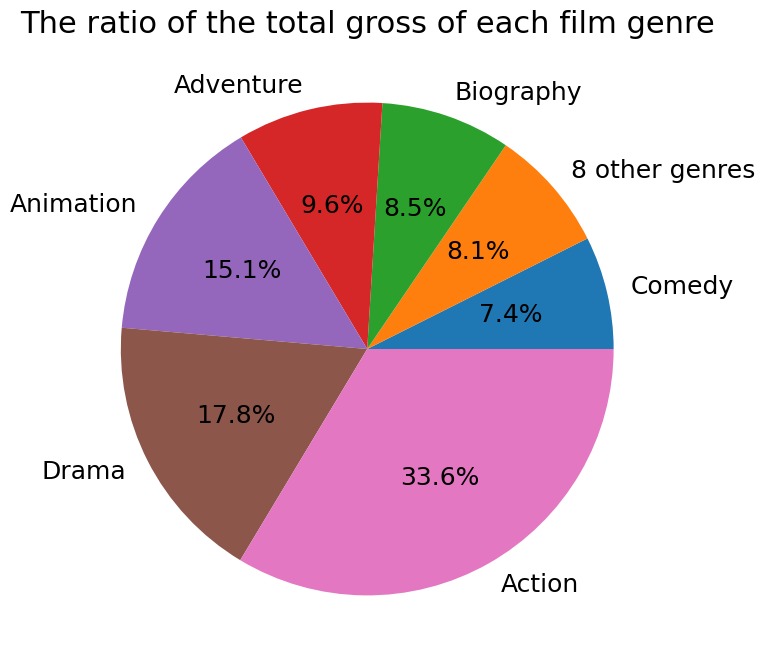

In [29]:
df = groupby_genre_totalGross.sort_values()
temp = pd.Series([df.head(8).sum()],index = ['8 other genres'])
df = df.add(temp, fill_value=0)
df = df.sort_values().tail(7)

ax = df.plot.pie(figsize=(8, 8),autopct='%1.1f%%',title ='asd',fontsize = 18)
ax.set_ylabel('');
ax.set_title('The ratio of the total gross of each film genre',fontsize =22);

In [13]:
print("4 genres show out the lowest gross")
print(groupby_genre_totalGross.sort_values().head(4))

4 genres show out the lowest gross
Genre
Film-Noir     2894356
Fantasy      10539940
Thriller     17550741
Western      58221508
Name: Gross, dtype: int64


**Assessing:**
- As a director, to maximize revenue, they need to focus on investing in movie genres such as `Animation`, `Drama`, `Action`. These 3 genres account for more than 50% of the total gross.
- If genres like `Fantasy`, `Thriller`, `Western` are not their forte, filmmakers should avoid going into the mess they can take. (Not to mention Film-Noir because this genre is outdated).

**Q2: How favorite customer genres trend differ over time?**

